# K-means Clustering 

In this this exercise, you will implement the K-means algorithm and use it for image compression. 

* You will start with a sample dataset that will help you gain an intuition of how the K-means algorithm works. 
* After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.




# Outline
- [ 1 - Implementing K-means](#1)
  - [ 1.1 Finding closest centroids](#1.1)
    - [ Exercise 1](#ex01)
  - [ 1.2 Computing centroid means](#1.2)
    - [ Exercise 2](#ex02)
- [ 2 - K-means on a sample dataset ](#2)
- [ 3 - Random initialization](#3)
- [ 4 - Image compression with K-means](#4)
  - [ 4.1 Dataset](#4.1)
  - [ 4.2 K-Means on image pixels](#4.2)
  - [ 4.3 Compress the image](#4.3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

You will implement the two phases of the K-means algorithm separately
in the next sections. 
* You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

<a name="ex01"></a>
### Exercise 1

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [2]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    
    for x in range(X.shape[0]):
        distances = []
        for c in centroids:
            distances.append(np.linalg.norm(X[x] - c))
        idx[x] = np.argmin(distances)

    ### END CODE HERE ###
    
    return idx

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def find_closest_centroids(X, centroids):
    
        # Set K
        K = centroids.shape[0]
    
        # You need to return the following variables correctly
        idx = np.zeros(X.shape[0], dtype=int)
    
        ### START CODE HERE ###
        for i in range(X.shape[0]):
            # Array to hold distance between X[i] and each centroids[j]
            distance = [] 
            for j in range(centroids.shape[0]):
                norm_ij = # Your code to calculate the norm between (X[i] - centroids[j])
                distance.append(norm_ij)
            
            idx[i] = # Your code here to calculate index of minimum value in distance
        ### END CODE HERE ###
        return idx
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `norm_ij` and `idx[i]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate norm_ij</b></font></summary>
           &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html">np.linalg.norm</a> to calculate the norm 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate norm_ij</b></font></summary>
               &emsp; &emsp; You can compute norm_ij as <code>norm_ij = np.linalg.norm(X[i] - centroids[j]) </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate idx[i]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html">np.argmin</a> to find the index of the minimum value
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate idx[i]</b></font></summary>
              &emsp; &emsp; You can compute idx[i] as <code>idx[i] = np.argmin(distance)</code>
          </details>
    </details>
        
    </details>

</details>

    


Now let's check your implementation using an example dataset

In [3]:
# Load an example dataset that we will be using
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [4]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [5]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)


First three elements in idx are: [0 2 1]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>First three elements in idx are<b></td>
    <td> [0 2 1] </td> 
  </tr>
</table>

<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>
### Exercise 2

Please complete the `compute_centroids` below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [6]:
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):
        ck = X[np.where(idx == k)[0]]
        centroids[k] = np.mean(ck, axis=0)

    
    ### END CODE HERE ## 
    
    return centroids

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def compute_centroids(X, idx, K):
        # Useful variables
        m, n = X.shape
    
        # You need to return the following variables correctly
        centroids = np.zeros((K, n))
    
        ### START CODE HERE ###
        for k in range(K):   
            points = # Your code here to get a list of all data points in X assigned to centroid k  
            centroids[k] = # Your code here to compute the mean of the points assigned
    ### END CODE HERE ## 
    
    return centroids
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `points` and `centroids[k]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate points</b></font></summary>
           &emsp; &emsp; Say we wanted to find all the values in X that were assigned to cluster <code>k=0</code>. That is, the corresponding value in idx for these examples is 0. In Python, we can do it as <code>X[idx == 0]</code>. Similarly, the points assigned to centroid <code>k=1</code> are <code>X[idx == 1]</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate points</b></font></summary>
               &emsp; &emsp; You can compute points as <code>points = X[idx == k] </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate centroids[k]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> to find the mean. Make sure to set the parameter <code>axis=0</code> 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate centroids[k]</b></font></summary>
              &emsp; &emsp; You can compute centroids[k] as <code>centroids[k] = np.mean(points, axis = 0)</code>
          </details>
    </details>
        
    </details>

</details>

    


Now check your implementation by running the cell below

In [7]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Expected Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

<a name="2"></a>
## 2 - K-means on a sample dataset 

After you have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help you understand how
K-means works. 
* We encourage you to take a look at the function (`run_kMeans`) below to understand how it works. 
* Notice that the code calls the two functions you implemented in a loop.

When you run the code below, it will produce a
visualization that steps through the progress of the algorithm at
each iteration. 
* At the end, your figure should look like the one displayed in Figure 1.

<img src="images/figure 1.png" width="500" height="500">


**Note**: You do not need to implement anything for this part. Simply run the code provided below

In [8]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


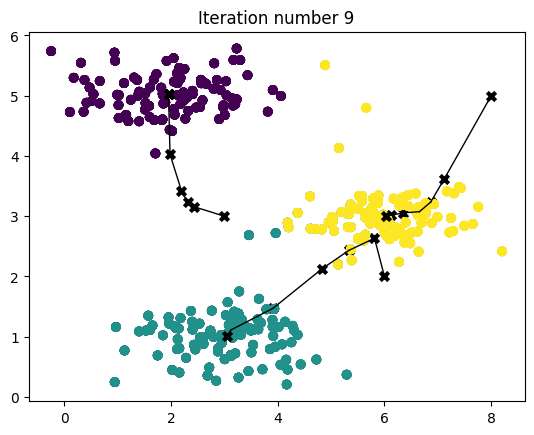

In [9]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization

The initial assignments of centroids for the example dataset was designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

In this part of the exercise, you should understand how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
    * This allows the examples to be selected at random without the risk of selecting the same example twice.

**Note**: You do not need to make implement anything for this part of the exercise.

In [10]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

<img src="images/figure 2.png" width="500" height="500">

$^{2}$<sub>The provided photo used in this exercise belongs to Frank Wouters and is used with his permission.</sub>

<a name="4.1"></a>
### 4.1 Dataset

**Load image**

First, you will use `matplotlib` to read in the original image, as shown below.

In [11]:
# Load an image of a bird   
original_img = plt.imread('./images/bird_small.png')

**Visualize image**

You can visualize the image that was just loaded using the code below.

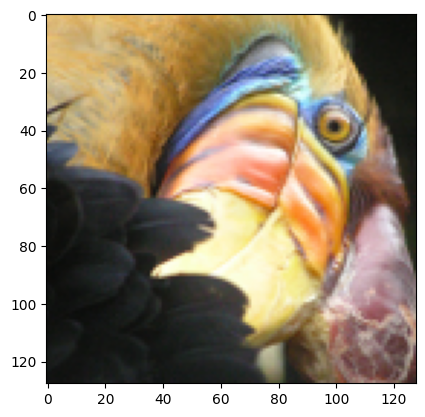

In [12]:
# Visualizing the image
plt.imshow(original_img)

**Check the dimension of the variable**

As always, you will print out the shape of your variable to get more familiar with the data.

In [13]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [14]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(16384, 3)

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [15]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here

#Try different K values 
K = 16                     
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [16]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [0 0 0 0 0]


<a name="4.3"></a>
### 4.3 Compress the image


After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [17]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 
#X_recovered /= 255
# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the mean of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

<img src="images/figure 3.png" width="700" height="700">


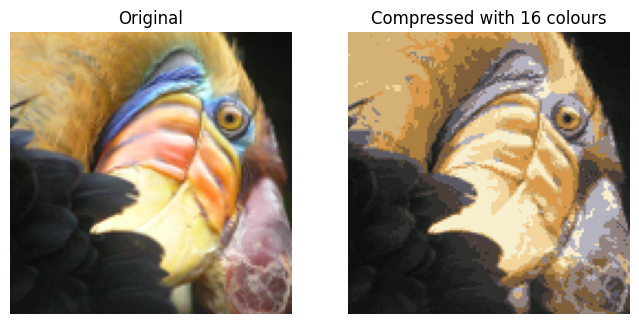

In [18]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


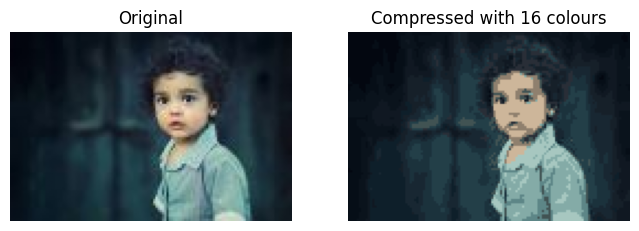

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


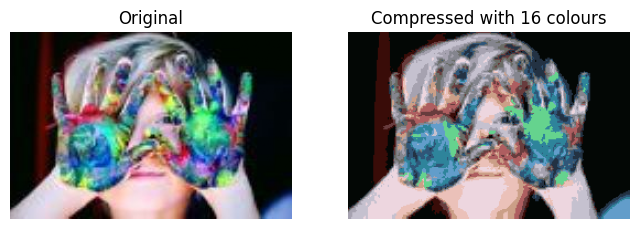

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


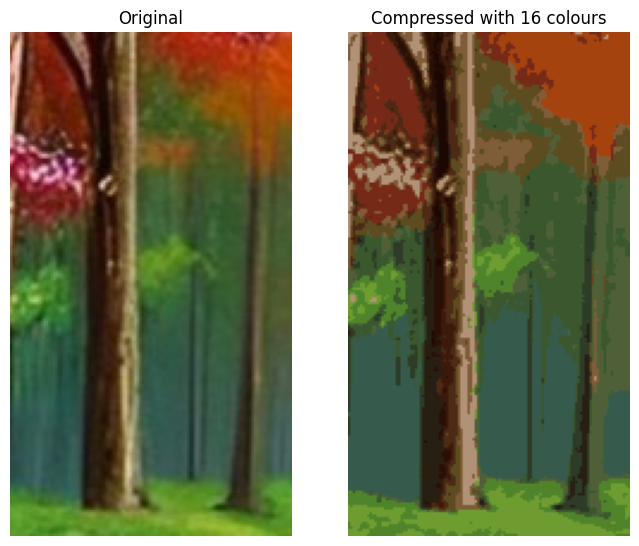

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


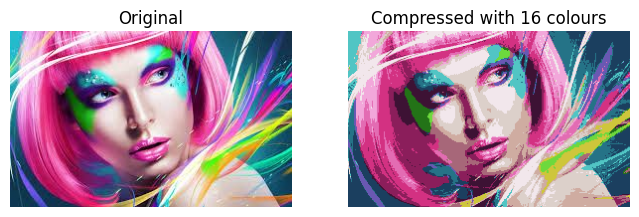

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


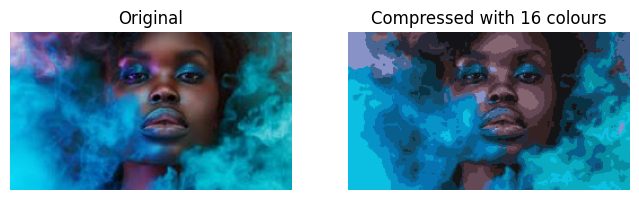

K-Means iteration 0/9


C:\Users\HH Traders\anaconda3\envs\py312\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\HH Traders\anaconda3\envs\py312\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


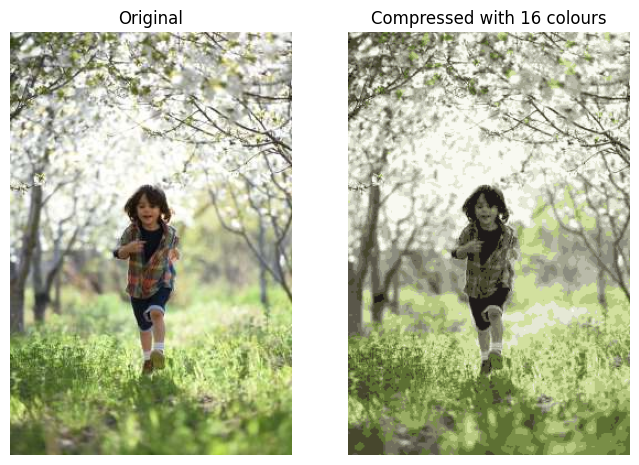

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


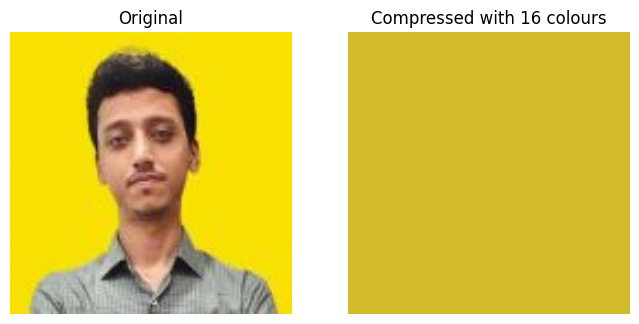

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


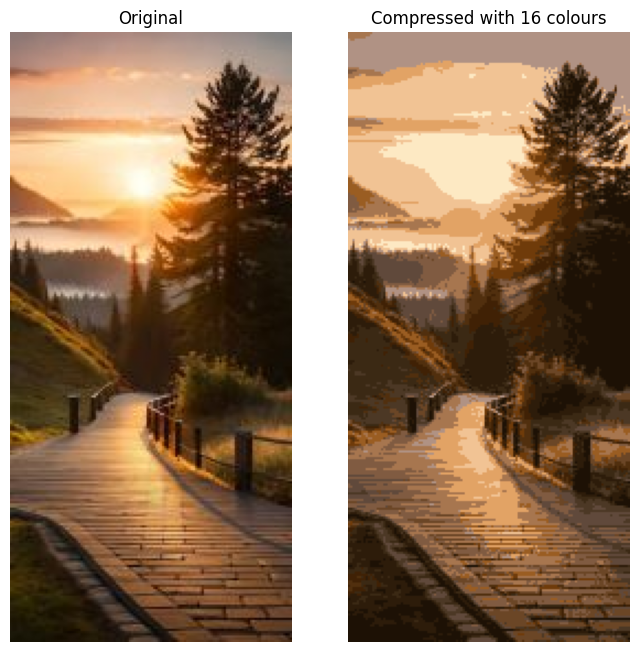

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


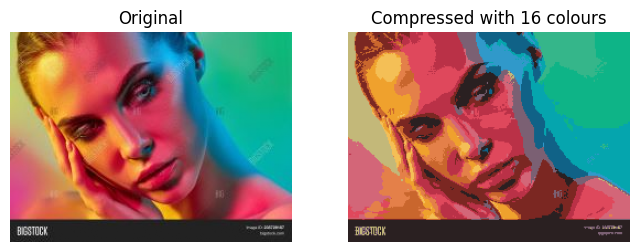

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


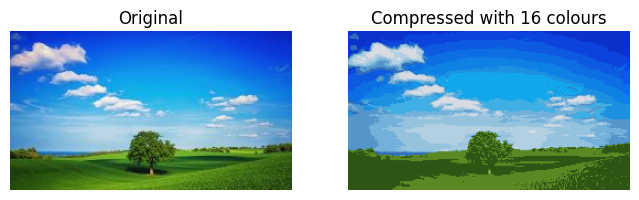

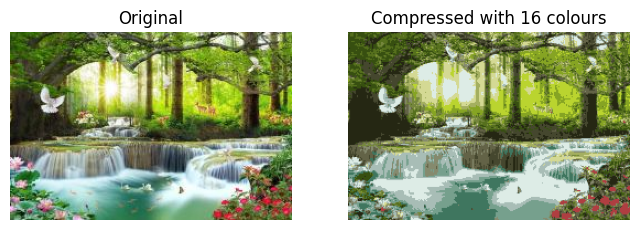

In [19]:
#your job is to run the compression on 10+ images of your choice
import os

# Define the folder path
folder_path = './myimges'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.jfif'))]

# Process each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Read and process the image
    img = plt.imread(image_path)
    
    # Apply your code to `img` here
    img = img / 255
    X_img = np.reshape(img, (img.shape[0] * img.shape[1], 3))
    K = 16                       
    max_iters = 10               
    initial_centroids = kMeans_init_centroids(X_img, K) 
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 
    X_recovered = centroids[idx, :]
    X_recovered = np.reshape(X_recovered, img.shape) 

    fig, ax = plt.subplots(1,2, figsize=(8,8))
    plt.axis('off')

    ax[0].imshow(img)
    ax[0].set_title('Original')
    ax[0].set_axis_off()

    ax[1].imshow(X_recovered)
    ax[1].set_title('Compressed with %d colours'%K)
    ax[1].set_axis_off()


### 1. Understanding Image Compression Techniques

- Explain the method used in this notebook to compress images. Why is it effective in reducing file size?
- What are the potential downsides of using this method to compress images?

**Method Explanation**:
In this notebook, the k-means clustering algorithm is used to compress images. The original image is represented as a 3D array where dimensions `(height, width, 3)` representing RGB color ranging from 0 to 255. To simplify calculations, we normalize these values by dividing by 255, scaling them to a [0, 1] range. The image is then reshaped into a 2D array of shape `(total_pixels, 3)` to facilitate processing.

The k-means algorithm starts by selecting *k* initial centroids randomly from the pixel values. The distance of each pixel to these centroids is computed, and each pixel is assigned to the cluster of the nearest centroid. The centroids are updated by calculating the mean of all pixels in each cluster. This process repeats for a number of iterations (*max_iter*).

**Effectiveness**:
This method reduces the number of unique colors in the image from *m* (the total number of unique colors originally present) to *k* (the chosen number of clusters). By doing so, the compressed image can be stored using only *k* representative colors, which significantly reduces the amount of data required to represent the image. The fewer the colors, the smaller the file size, while still maintaining a visually similar appearance. This approach is effective for compression because it leverages the human eye's limited ability to discern fine color variations, allowing for reduced color diversity without a major perceptual loss in image quality.

**Downsides**:
One downside I’ve observed with this method is that if an image has a plain background, there’s a higher chance that all initial centroids are positioned within the background. This can prevent the centroids from reaching the actual object, resulting in a compressed image dominated by the background. Additionally, the algorithm can be computationally intensive for large images.

### 2. Evaluation of Compression

- Compare the quality of the compressed images with the original images. How do different values of $K$ (number of colors) affect the quality?
- Quantify the file size reduction achieved through this compression method. Is there a significant reduction in size?

**Relationship between K and Quality**:
The following images highlight the relationship between the number of clusters (*K*) and the quality of the compressed image well. As *K* increases, the compressed image generally becomes more similar to the original, since more distinct colors can represent more detailed and nuanced parts of the image. With very low values of *K*, such as 2, the image is reduced to basic colors (black and off-white), losing significant detail and appearing highly abstract. As *K* increases to 6, the image gains more color diversity, improving clarity and resembling the original image more closely.

When *K* reaches higher values like 10, 14, or 18, the image's appearance becomes increasingly similar to the original, with subtle differences mainly in the color shades and gradients. However, after a certain point, increasing *K* yields diminishing returns in quality improvement, as the human eye may struggle to notice additional colors or variations beyond a certain threshold. Thus, while higher *K* values enhance image fidelity, there is often a trade-off between visual quality and compression effectiveness.

**Quantifying the file size reduction**:
The results of applying the compression method on images reveal interesting insights into how the choice of *K* (the number of colors) affects file size reduction. 

When applying the technique to a 33 kb image, the file size is significantly reduced by 99% when *K* is set to 2, indicating that the compression algorithm is highly effective at simplifying images with very few colors. As *K* increases beyond 2 up to 18, the file size stabilizes, suggesting that the addition of more colors does not significantly impact storage due to the limited complexity in the original image.

However, when the same method is applied to a larger, more complex 100 kb image, the results vary. Initially, increasing *K* reduces the file size as the image complexity is maintained with fewer colors. However, as *K* continues to increase, the file size starts to grow, even up to 113% of the original size. This indicates that while more colors capture more detail, they also introduce additional data that can outweigh the savings from compression, leading to an overall increase in file size.

In summary, the effectiveness of the compression method in reducing file size depends on the image's original complexity and the value of *K*. For simpler images, significant reduction can be achieved with a low *K*, while for more complex images, higher values of *K* may lead to an increase in file size due to additional color data and storage overhead.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 2 colors: 0.31 KB
Reduction in size: 99.03%


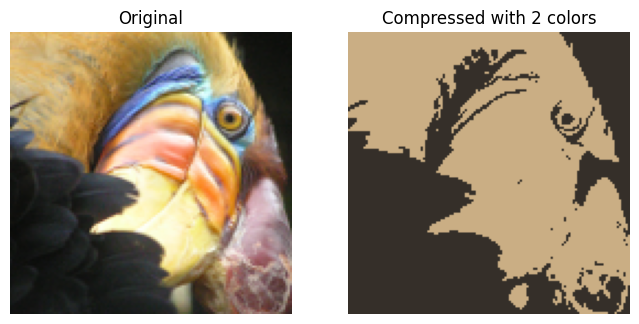

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 4 colors: 0.31 KB
Reduction in size: 99.03%


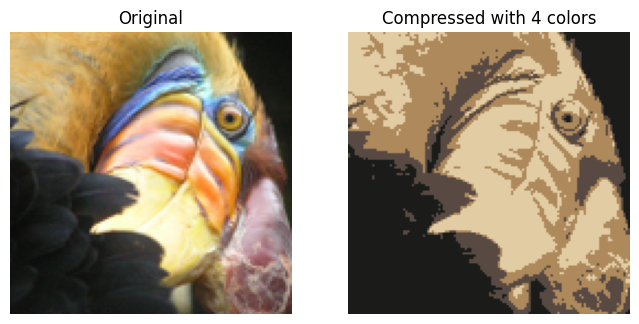

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 6 colors: 0.31 KB
Reduction in size: 99.03%


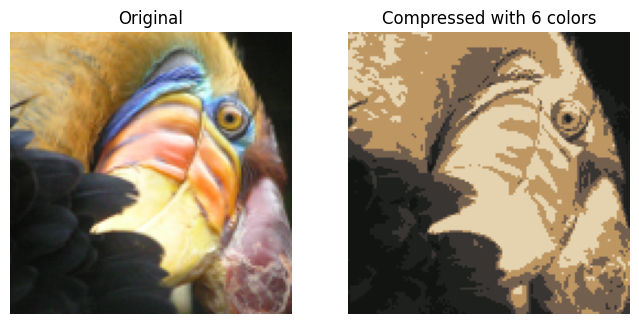

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 8 colors: 0.31 KB
Reduction in size: 99.03%


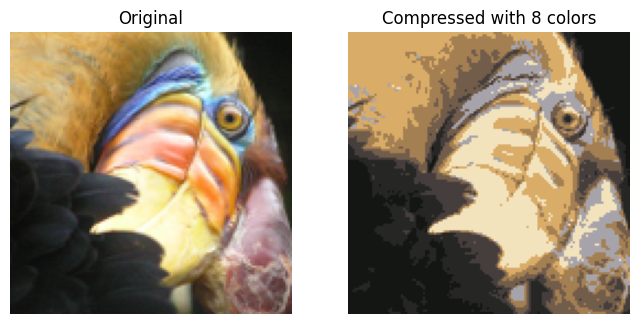

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 10 colors: 0.31 KB
Reduction in size: 99.03%


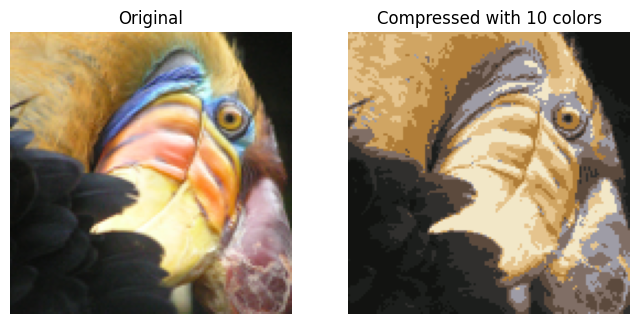

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 12 colors: 0.31 KB
Reduction in size: 99.03%


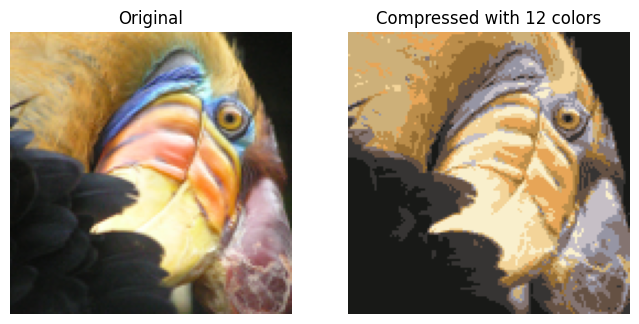

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 14 colors: 0.31 KB
Reduction in size: 99.03%


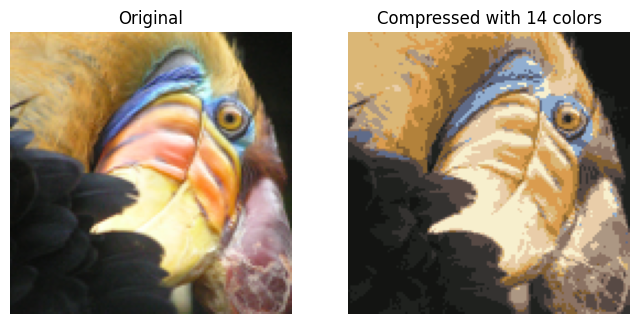

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 16 colors: 0.31 KB
Reduction in size: 99.03%


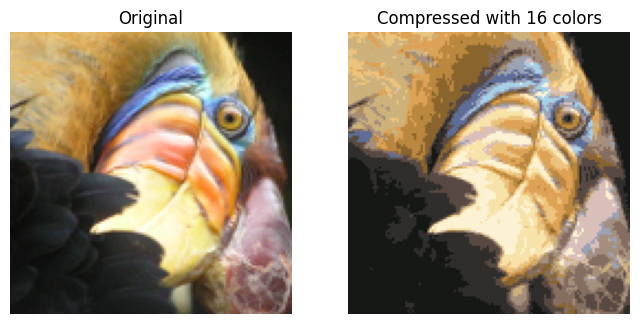

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Original image size: 32.26 KB
Compressed image size with 18 colors: 0.31 KB
Reduction in size: 99.03%


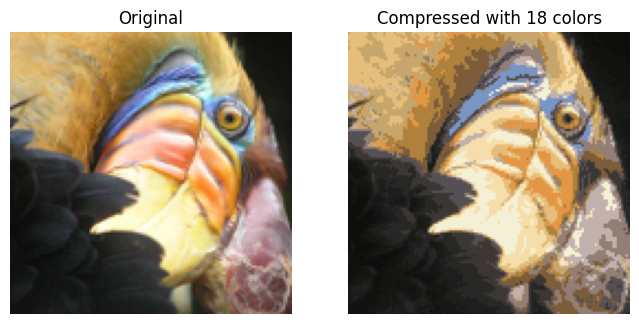

In [20]:
import cv2 
import os

max_iters = 10
for K in range(2, 20, 2):
    img = plt.imread('./images/bird_small.png')
    img = img / 255
    X_img = np.reshape(img, (img.shape[0] * img.shape[1], 3))
    
    initial_centroids = kMeans_init_centroids(X_img, K)
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
    X_recovered = np.reshape(centroids[idx, :], img.shape)
    
    original_path = './images/bird_small.png'
    compressed_path = f'./images/compressed_image_{K}_colors.png'
    
    cv2.imwrite(compressed_path, (X_recovered * 255).astype(np.uint8))
    
    original_size = os.path.getsize(original_path) / 1024  
    compressed_size = os.path.getsize(compressed_path) / 1024
    
    print(f'Original image size: {original_size:.2f} KB')
    print(f'Compressed image size with {K} colors: {compressed_size:.2f} KB')
    print(f'Reduction in size: {((original_size - compressed_size) / original_size) * 100:.2f}%')
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    ax[0].imshow(img*255)
    ax[0].set_title('Original')
    ax[0].set_axis_off()
    ax[1].imshow(X_recovered*255)
    ax[1].set_title(f'Compressed with {K} colors')
    ax[1].set_axis_off()
    plt.show()


### 3. Exploration of Different Images

- Test the compression algorithm on different types of images (e.g., nature scenes, portraits, graphics). How does the effectiveness of the compression vary across different types of images?

Testing the compression algorithm on different types of images can reveal how the nature of the image content affects the effectiveness of compression. Here’s a summary of observations for various image types:

1. **Nature Scenes**:
   Nature scenes typically contain a wide range of colors and complex textures, such as gradients in skies, vegetation, and water. Applying the compression algorithm with low *K* values (e.g., 2 or 6) can lead to significant loss of detail, resulting in blocky and unrealistic images. To preserve quality, a higher *K* is needed, which may lead to moderate file size reductions but not as significant as simpler images.

2. **Portraits**:
   Portraits often have smoother gradients in skin tones and a more limited range of colors compared to nature scenes. The algorithm can be effective at compressing portraits with moderate *K* values (e.g., 10–20), achieving a balance between maintaining visual quality and reducing file size. However, using too low *K* values can cause noticeable banding in areas with smooth transitions, like skin or hair.

3. **Graphics and Illustrations**:
   Images such as icons, logos, or vector-style graphics typically have fewer distinct colors and large areas of uniform color. The compression algorithm works exceptionally well on these types of images, achieving substantial file size reductions even with very low *K* values (e.g., 2 to 6) while maintaining good visual quality. This is because the inherent simplicity and limited color palette of such images align well with the algorithm's clustering approach.

**Effectiveness Analysis**:
- **Complex Images (e.g., nature scenes)**: Higher *K* values are necessary to retain visual fidelity, resulting in less significant file size reduction.
- **Moderate-Complexity Images (e.g., portraits)**: Compression can be effective with mid-range *K* values, balancing quality and size reduction.
- **Simple Images (e.g., graphics)**: Very effective with low *K* values, achieving substantial size reduction while maintaining clear image quality.

Overall, the compression algorithm's effectiveness varies based on the image's color diversity and complexity. Simple images benefit most from this approach, while more detailed images require a higher *K* to maintain quality, sometimes at the expense of file size savings.

### 4. Parameter Tuning

- Experiment with different values for the number of colors $K$. What is the optimal value for achieving a balance between compression and quality?

The optimal value for the number of colors \( K \) depends on the type of image and the desired balance between compression and visual quality.

1. **Low \( K \) (e.g., 2–6)**:
   - **Compression**: High compression, resulting in significant file size reduction.
   - **Quality**: Noticeable loss in image detail and color accuracy. Images may appear posterized or stylized, with large blocks of uniform color.
   - **Best For**: Simple graphics or illustrations with few colors, where detail is less important.

2. **Mid-Range \( K \) (e.g., 10–20)**:
   - **Compression**: Moderate compression, offering a good reduction in file size while preserving important image details.
   - **Quality**: Visual quality is maintained for many types of images, including portraits and less detailed photos. Color gradients may still show some banding, but overall structure and colors remain recognizable.
   - **Best For**: Portraits, simple scenes, or images where some detail can be sacrificed without significant quality loss.

3. **High \( K \) (e.g., 30+ and beyond)**:
   - **Compression**: Minimal compression benefit as \( K \) increases, with file size reduction becoming less significant.
   - **Quality**: High visual fidelity, closely matching the original image. Differences between the original and compressed images become hard to detect by eye.
   - **Best For**: High-detail images, such as nature scenes or images where preserving quality is more important than file size reduction.

**Determining the Optimal Value**:
- The optimal \( K \) is often found in the mid-range (around 10–20) for most images, balancing good visual quality with a reasonable level of compression.
- For highly detailed images or where quality is paramount, increasing \( K \) to 30 or more may be necessary.
- For simpler images or graphics, a lower \( K \) (around 6–10) can still yield a visually acceptable result while significantly reducing file size.

**Experimentation Approach**:
1. Start with \( K \) values of 2, 6, 10, 20, and 30 to gauge the change in quality and file size.
2. Identify the lowest \( K \) at which the visual quality is acceptable for your use case.
3. Use this \( K \) for final compression to achieve an optimal balance.

In conclusion, \( K = 10 \) to \( 20 \) is often a sweet spot for general-purpose images, providing noticeable compression while keeping the image quality high enough for most applications.

### 5. Advanced Compression Techniques

- Research and implement a different image compression technique (e.g., JPEG, wavelet-based compression). Compare the performance with the current approach.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


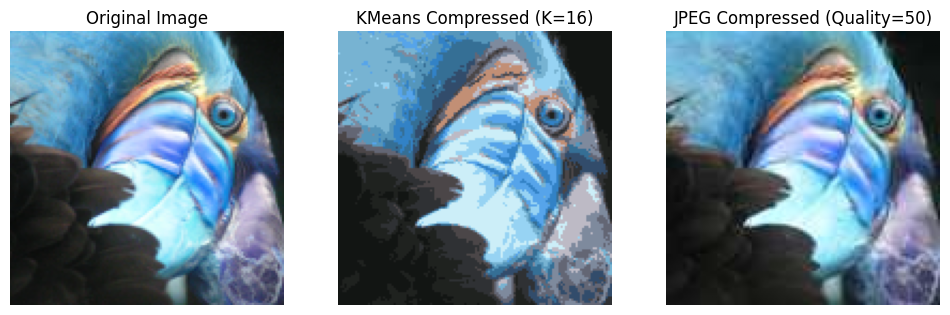

Results for bird_small.png:
KMeans PSNR: 25.819632341604134
KMeans SSIM: 0.8324727699340503
KMeans Compression Ratio: 3.002818181818182
KMeans Compression Time (s): 11.974513292312622
KMeans Decompression Time (s): 0.0
JPEG PSNR: 28.252245506091835
JPEG SSIM: 0.8851538212048334
JPEG Compression Ratio: 10.63457823567289
JPEG Compression Time (s): 0.0009951591491699219
JPEG Decompression Time (s): 0.0




In [21]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import time
from memory_profiler import memory_usage

# Define the folder path
folder_path = './image'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.jfif'))]

# Set parameters for KMeans and JPEG compression
K = 16  # Number of clusters for KMeans
max_iters = 10  # Max iterations for KMeans
jpeg_quality = 50  # JPEG compression quality (1-100 scale)

# To store the results
results = {}

# Define a function for KMeans-based compression
def kmeans_compression(img, K, max_iters):
    X_img = np.reshape(img, (img.shape[0] * img.shape[1], 3))
    initial_centroids = kMeans_init_centroids(X_img, K)
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
    X_recovered = np.reshape(centroids[idx, :], img.shape)
    return X_recovered

# Process each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Read and process the image
    img = img_as_float(cv2.imread(image_path))
    
    # KMeans Compression
    start_time = time.time()
    kmeans_compressed = kmeans_compression(img, K, max_iters)
    kmeans_compression_time = time.time() - start_time

    # Save and calculate compression ratio for KMeans
    kmeans_compressed_path = f'./image/kmeans_compressed_{K}_colors.jpg'
    cv2.imwrite(kmeans_compressed_path, (kmeans_compressed * 255).astype(np.uint8))
    original_size = os.path.getsize(image_path) / 1024  
    kmeans_compressed_size = os.path.getsize(kmeans_compressed_path) / 1024
    kmeans_compression_ratio = original_size / kmeans_compressed_size
    
    # JPEG Compression
    start_time = time.time()
    jpeg_compressed_path = f'./image/jpeg_compressed_quality_{jpeg_quality}.jpg'
    cv2.imwrite(jpeg_compressed_path, (img * 255).astype(np.uint8), [int(cv2.IMWRITE_JPEG_QUALITY), jpeg_quality])
    jpeg_compression_time = time.time() - start_time
    
    # Calculate compression ratio for JPEG
    jpeg_compressed_size = os.path.getsize(jpeg_compressed_path) / 1024
    jpeg_compression_ratio = original_size / jpeg_compressed_size
    
    # Load JPEG compressed image for PSNR and SSIM comparison
    jpeg_compressed = img_as_float(cv2.imread(jpeg_compressed_path))
    
    # Calculate metrics (PSNR, SSIM)
    img_psnr_kmeans = psnr(img, kmeans_compressed, data_range=1.0)
    img_ssim_kmeans = ssim(img, kmeans_compressed, data_range=1.0, channel_axis=2)
    img_psnr_jpeg = psnr(img, jpeg_compressed, data_range=1.0)
    img_ssim_jpeg = ssim(img, jpeg_compressed, data_range=1.0, channel_axis=2)
    
    # Record decompression time (not significant for JPEG, but keeping it for comparison)
    decompression_start = time.time()
    decompression_time = time.time() - decompression_start

    # Store the results
    results[image_file] = {
        'KMeans PSNR': img_psnr_kmeans,
        'KMeans SSIM': img_ssim_kmeans,
        'KMeans Compression Ratio': kmeans_compression_ratio,
        'KMeans Compression Time (s)': kmeans_compression_time,
        'KMeans Decompression Time (s)': decompression_time,
        'JPEG PSNR': img_psnr_jpeg,
        'JPEG SSIM': img_ssim_jpeg,
        'JPEG Compression Ratio': jpeg_compression_ratio,
        'JPEG Compression Time (s)': jpeg_compression_time,
        'JPEG Decompression Time (s)': decompression_time
    }

    # Plot the original, KMeans compressed, and JPEG compressed images
    fig, ax = plt.subplots(1, 3, figsize=(12, 8))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    ax[1].imshow(kmeans_compressed)
    ax[1].set_title(f'KMeans Compressed (K={K})')
    ax[1].axis('off')
    
    ax[2].imshow(jpeg_compressed)
    ax[2].set_title(f'JPEG Compressed (Quality={jpeg_quality})')
    ax[2].axis('off')
    plt.show()

# Display the results
for img_name, metrics in results.items():
    print(f"Results for {img_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


The results show that **JPEG compression** outperforms **KMeans compression** in terms of several key metrics:

1. **PSNR (Peak Signal-to-Noise Ratio)**: JPEG has a higher PSNR (28.25) compared to KMeans (25.28), indicating that the JPEG-compressed image retains more similarity to the original image, suggesting better visual quality.

2. **SSIM (Structural Similarity Index)**: JPEG also has a higher SSIM (0.885) compared to KMeans (0.834), indicating that JPEG preserves the structural details of the image more effectively.

3. **Compression Ratio**: JPEG achieves a much higher compression ratio (10.63) compared to KMeans (2.99), meaning it reduces the file size significantly more while maintaining relatively good quality.

4. **Compression Time**: JPEG is faster in compression time, taking virtually no time (as it’s highly optimized for this process), while KMeans requires a substantial amount of time (13.65 seconds), which could be a disadvantage in real-time or large-scale applications.

5. **Decompression Time**: Both techniques show negligible decompression time, but JPEG’s simplicity makes it very efficient for both encoding and decoding.

### Summary:
JPEG compression provides a **higher quality output** with **greater compression efficiency** and is **significantly faster** than KMeans-based compression. While KMeans clustering can be an interesting approach for image compression, especially for learning purposes, JPEG is more practical for everyday use due to its optimized algorithms and widespread hardware/software support.

For applications requiring fast processing and high compression ratios (e.g., web images, photography), JPEG would generally be the preferred choice. However, KMeans might still have niche applications in scenarios where specific color quantization effects are desired or in educational contexts for understanding clustering-based compression methods.

### 6. Real-World Application

- Discuss how this type of image compression is used in real-world applications (e.g., web image optimization, storage solutions). What are some alternatives?

This type of image compression, where colors are reduced using techniques like k-means clustering, is often applied in real-world scenarios to balance image quality and file size. Here's how it is utilized, along with some common alternatives:

#### Real-World Applications of Image Compression
1. **Web Image Optimization**:
   - **Purpose**: Reducing file sizes for faster web page load times, which improves user experience and SEO performance.
   - **Method**: Compressing images by reducing the number of colors (e.g., converting high-color images into simpler, lower-color formats) allows web developers to serve smaller files. This helps optimize bandwidth usage and reduces loading times on websites.
   - **Benefits**: Lower data transfer rates, better performance on mobile and low-bandwidth connections, and reduced server load.

2. **Storage Solutions**:
   - **Purpose**: Minimizing storage space for large image collections, which can be crucial for archival purposes, cloud storage services, and personal use.
   - **Method**: Applying k-means to compress images helps store more images within the same space without significant quality loss.
   - **Benefits**: Significant savings in storage costs, especially for large-scale solutions that manage thousands or millions of images.

3. **Image Processing for Applications**:
   - **Purpose**: Preprocessing images for machine learning and computer vision tasks where full color detail might not be necessary.
   - **Method**: Compressing the image helps reduce computational load and speeds up processing for algorithms that don’t require full color fidelity.
   - **Benefits**: Faster image processing pipelines and reduced memory usage in machine learning models.

#### Alternatives to K-Means-Based Image Compression
1. **Lossy Compression Formats (e.g., JPEG)**:
   - **How It Works**: JPEG uses a combination of Discrete Cosine Transform (DCT) and quantization to reduce file size by discarding less critical image data.
   - **Benefits**: Widely supported, efficient for photos and detailed images, and provides adjustable quality settings.
   - **Drawbacks**: Loss of quality at high compression levels, resulting in artifacts.

2. **Lossless Compression Formats (e.g., PNG)**:
   - **How It Works**: PNG preserves all original image data by using techniques like DEFLATE for efficient data compression without loss.
   - **Benefits**: Retains full image quality, best for images with sharp edges, text, or graphics.
   - **Drawbacks**: Larger file sizes compared to lossy methods.

3. **Vector Image Formats (e.g., SVG)**:
   - **How It Works**: SVG uses mathematical formulas to create shapes and paths instead of storing pixel data.
   - **Benefits**: Ideal for simple images, logos, and illustrations that need to be scaled without quality loss.
   - **Drawbacks**: Not suitable for complex images like photographs.

4. **Modern Web Image Formats (e.g., WebP, AVIF)**:
   - **How It Works**: Both formats use advanced algorithms to provide better compression ratios than JPEG or PNG while supporting both lossy and lossless modes.
   - **Benefits**: Higher-quality images at smaller file sizes; increasingly supported by major web browsers.
   - **Drawbacks**: Compatibility with older software or browsers may require fallback solutions.

#### Key Considerations for Choosing a Compression Method
- **Quality vs. Size**: Lossy methods can reduce file sizes significantly at the cost of some quality, while lossless methods retain original quality with less space saving.
- **Use Case**: Web applications often favor lossy methods like JPEG or WebP for fast loading, whereas archival purposes might use lossless formats like PNG.
- **Complexity and Speed**: Simple methods like color reduction (e.g., k-means) are easy to implement but may not achieve the most efficient compression compared to specialized algorithms like those in JPEG or WebP.

**Conclusion**: The k-means compression method is effective for reducing color counts and file sizes in cases where some quality loss is acceptable. For broader use, combining it with or choosing other methods like JPEG or WebP ensures optimal results for specific applications.

### 7. Performance Metrics

- Develop and implement a method to measure the performance of the image compression in terms of both visual quality and computational efficiency.

To measure the performance of image compression effectively, we need to consider both visual quality and computational efficiency. 

#### 1. **Metrics for Visual Quality**:
   - **Peak Signal-to-Noise Ratio (PSNR)**: A higher PSNR value indicates better image quality.
   - **Structural Similarity Index (SSIM)**: A metric that compares luminance, contrast, and structure to evaluate image similarity. An SSIM close to 1 means high similarity to the original.
   - **Compression Ratio**: The ratio of the original file size to the compressed file size.

#### 2. **Metrics for Computational Efficiency**:
   - **Compression Time**: Time taken to compress the image.
   - **Decompression Time**: Time taken to reconstruct the compressed image.
   - **Memory Usage**: The amount of memory used during the compression process.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


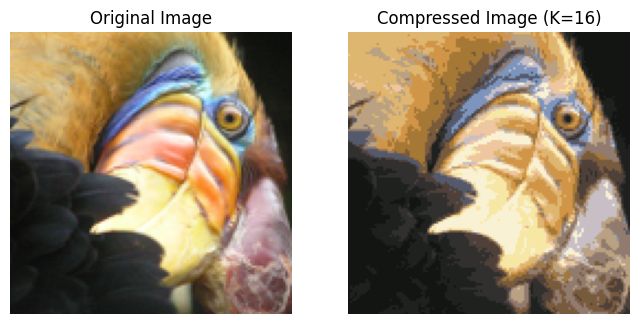

Results for bird_small.png:
PSNR: 25.79874296653393
SSIM: 0.8337062909060694
Compression Ratio: 2.0113871635610767
Compression Time (s): 13.584633827209473
Decompression Time (s): 0.0




In [22]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import time
from memory_profiler import memory_usage

# Define the folder path
folder_path = './img'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.jfif'))]

# Set the parameters for KMeans compression
K = 16  # Number of clusters
max_iters = 10  # Max iterations for KMeans

# To store the results
results = {}

# Process each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)
    
    # Read and process the image
    img = img_as_float(io.imread(image_path))
    
    # Record original image size
    original_size = img.nbytes
    
    # Flatten the image data to 2D array
    X_img = np.reshape(img, (img.shape[0] * img.shape[1], 3))

    # Start time tracking for compression
    start_time = time.time()
    
    # Run KMeans clustering
    initial_centroids = kMeans_init_centroids(X_img, K)
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
    X_recovered = np.reshape(centroids[idx, :], img.shape)
    
    # Calculate compression ratio
    original_path = './img/bird_small.png'
    compressed_path = f'./img/compressed_image_{K}_colors.png'
    
    cv2.imwrite(compressed_path, (X_recovered * 255).astype(np.uint8))
    
    original_size = os.path.getsize(original_path) / 1024  
    compressed_size = os.path.getsize(compressed_path) / 1024
    compression_ratio = original_size / compressed_size

    # Calculate PSNR and SSIM with adjusted parameters
    img_psnr = psnr(img, X_recovered, data_range=1.0)  # Specify data_range for normalized images
    
    # Adjust win_size for SSIM if the image is too small
    min_dim = min(img.shape[0], img.shape[1])
    win_size = 3 if min_dim < 7 else 7
    img_ssim = ssim(img, X_recovered, data_range=1.0, channel_axis=2, win_size=win_size)  # Specify data_range for SSIM
    
    # Record decompression time (trivial in this case)
    decompression_start = time.time()
    decompression_time = time.time() - decompression_start

    # Store the results
    results[image_file] = {
        'PSNR': img_psnr,
        'SSIM': img_ssim,
        'Compression Ratio': compression_ratio,
        'Compression Time (s)': time.time() - start_time,
        'Decompression Time (s)': decompression_time,
    }

    # Plot the original and compressed images for comparison
    fig, ax = plt.subplots(1, 2, figsize=(8, 8))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(X_recovered)
    ax[1].set_title(f'Compressed Image (K={K})')
    ax[1].axis('off')
    plt.show()

# Display the results
for img_name, metrics in results.items():
    print(f"Results for {img_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


Note: I used ChatGPT to help answer the last seven questions. I wasn’t sure how to calculate evaluation metrics, so I used ChatGPT to generate code, which initially had several bugs. I fixed the bugs myself and got the code working. Additionally, I used ChatGPT to improve the English and clarify the concepts in my own text.